# ARMA

In [49]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [50]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

## ADF Test
- ADF Test를 정리해보면, 차분을 여러 래그에 대해 수행하였을 때 $y_{t-1}$의 계수인 $\alpha$가 1이라면 stationary하지 않다는 것입니다. 반대로 귀무가설이 기각된다면 $\alpha$가 1보다 작게 되는 것이므로 stationary 하다고 판단할 수 있는 것입니다.

In [51]:
def perform_adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic:{result[0]}')
    print(f'p-value:{result[1]}')

## 데이터 불러오기

In [52]:
series = pd.read_csv('../datasets/catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

C:\Users\qkrtj\AppData\Local\Temp\ipykernel_19716\393707783.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('../datasets/catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


## stationary 확인 
- p-value 값이 0.5 이하이면 귀무가설을 기각해 대립가설 채택
- 즉, stationary하다고 판단할 수 있음

In [53]:
perform_adf_test(series)

ADF Statistic:-7.162321332721343
p-value:2.946209595690233e-10


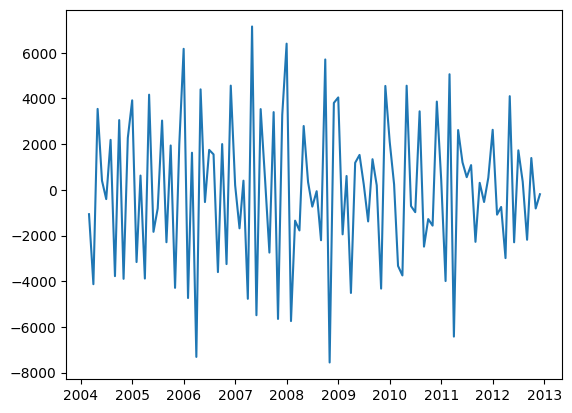

In [54]:
plt.plot(series)

## ACF / PACF 그래프 그려보기
- 파란 범위 안에 들어가면 상관관계가 약한것이고 벗어나면 상관관계 강한 것

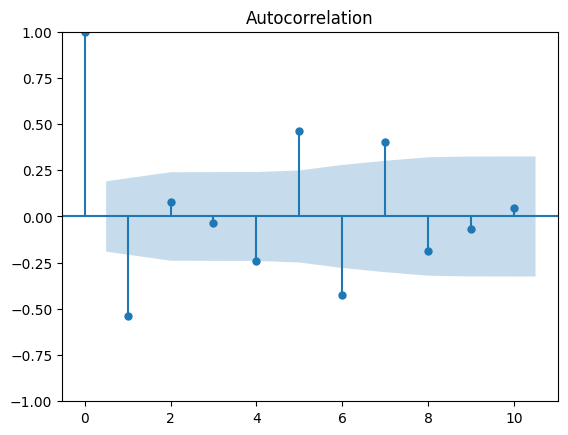

In [55]:
plot_acf(series, lags=10)
plt.show()

c:\users\qkrtj\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


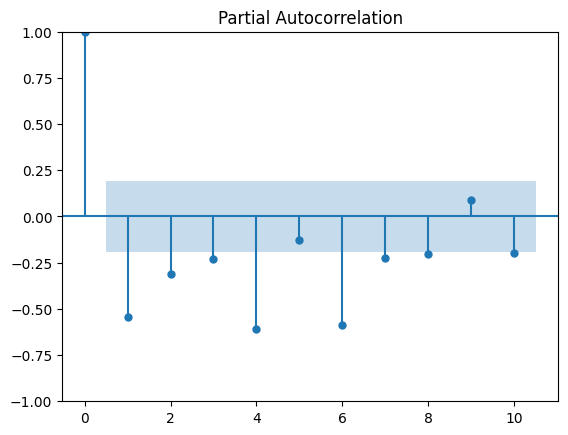

In [56]:
plot_pacf(series, lags=10)
plt.show()

## AR(p)에서 p값 찾기 위한 for문
- ar(6) -> feature 값 6개 가짐
- 우도(likelihood)는 0과 1사이 값을 가지는데 클수록 좋음 -> 좋은 model인지 파악 가능
- AIC / BIC => 작을수록 좋음 -> 모델의 하이퍼파라미터 선정하는데 사용
- AIC : 같은 성능을 가진다면 feature 몇개 선정할지 정할때 봄 (feature 적을수록 좋음) => ar(p)의 p값 찾음
- BIC : 같은 성능을 가질 때 데이터의 개수 선정하는거 (데이터의 개수 적을수록 좋음) 

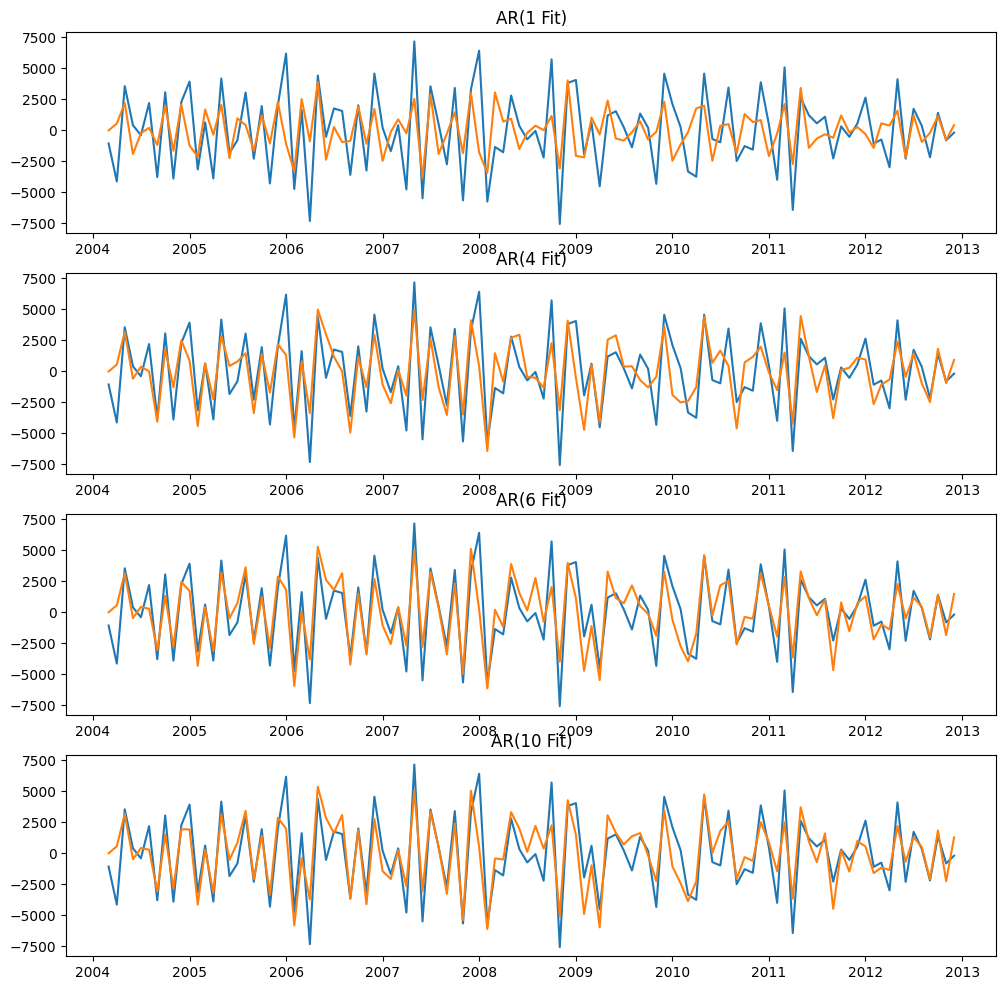

In [57]:
plt.figure(figsize=(12,12))

ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    # create AR(p) 모델 => p값 정하기 위해서 for문 돌리는 것
    ar_model = ARIMA(series, order=(ar_order,0,0)) # AR은 ar_order, MA는 0, 차분 0 -> AR(p) 모델으로
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit # 빈 딕셔너리에 값 추가
    plt.subplot(4, 1, idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title(f'AR({ar_order} Fit)')

In [58]:
for ar_order in ar_orders:
    print(f'AIC for ar({ar_order}): {fitted_model_dict[ar_order].aic}')

AIC for ar(1): 1980.860621744531
AIC for ar(4): 1927.6099852660273
AIC for ar(6): 1899.649744238134
AIC for ar(10): 1902.376544974346


In [59]:
for ar_order in ar_orders:
    print(f'BIC for ar({ar_order}): {fitted_model_dict[ar_order].bic}')

BIC for ar(1): 1988.8509390268673
BIC for ar(4): 1943.5906198306996
BIC for ar(6): 1920.9572569910306
BIC for ar(10): 1934.3378141036908
